## Importing the libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression,LinearRegression, Ridge, SGDRegressor,Lasso
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
import math
from sklearn.preprocessing import PolynomialFeatures

## Importing Dataset and visulize it

In [307]:
df = pd.read_csv('HOME_PRICE.csv')
df= df.loc[:,~df.columns.str.contains('^Unnamed: 0')]
df.head()

,Property_Type,Meterage,Price,price_(square_meter),Area,Year_of_construction,Bedrooms,Direction_of_the_building,Type_of_Document,Floor,...,Cooling,Heating,Hot_water,Date_of_Release,latitude,longitude,site,Elevator,Warehouse,Parking
0,Apateman,136.0,"12,500,000,000","91,900,000",امیرآباد تهران,1401.0,3.0,North,True,4.0,...,Water Cooler,Duct Split,package,4 last week,35.733903,51.394386,https://shabesh.com/,1,1,1
1,Apateman,108.0,"7,500,000,000","69,400,000",دولت تهران,1383.0,2.0,North,True,2.0,...,Water Cooler,heating,Powerhouse,3 last week,35.780815,51.450526,https://shabesh.com/,0,1,1
2,Apateman,71.0,"4,900,000,000","69,000,000",جنت آباد مرکزی تهران,1397.0,2.0,North,True,1.0,...,Water Cooler,heating,package,3 last week,35.758078,51.301245,https://shabesh.com/,1,1,1
3,Apateman,135.0,"13,500,000,000","100,000,000",امیرآباد تهران,1401.0,3.0,South,True,2.0,...,Water Cooler,Duct Split,package,4 last week,35.738292,51.398549,https://shabesh.com/,1,1,1
4,Apateman,117.0,"9,200,000,000","78,600,000",یوسف آباد تهران,1394.0,2.0,South,True,4.0,...,Water Cooler,heating,package,3 last week,35.735418,51.400867,https://shabesh.com/,1,1,1


In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5603 entries, 0 to 5602
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Property_Type              5603 non-null   object 
 1   Meterage                   5603 non-null   float64
 2   Price                      5603 non-null   object 
 3   price_(square_meter)       5603 non-null   object 
 4   Area                       5603 non-null   object 
 5   Year_of_construction       5603 non-null   float64
 6   Bedrooms                   5603 non-null   float64
 7   Direction_of_the_building  5603 non-null   object 
 8   Type_of_Document           5603 non-null   bool   
 9   Floor                      5603 non-null   float64
 10  Number_of_floors           5603 non-null   float64
 11  W.C                        5603 non-null   object 
 12  Number_of_floor_units      5603 non-null   float64
 13  Floor_type                 5603 non-null   objec

In [309]:
df.rename(columns={'price_(square_meter)':'Price_meter'}, inplace=True)

In [310]:
df["Price_meter"] = df["Price_meter"].str.replace(',', '')

In [311]:
df['Price_meter'] = df['Price_meter'].astype(float)


In [312]:
df=df.drop(['Property_Type','Floor_type','Price','Cooling','Direction_of_the_building','Type_of_Document','Heating','Hot_water','site','W.C','Nama','Date_of_Release'],axis=1)
df.head()

,Meterage,Price_meter,Area,Year_of_construction,Bedrooms,Floor,Number_of_floors,Number_of_floor_units,latitude,longitude,Elevator,Warehouse,Parking
0,136.0,91900000.0,امیرآباد تهران,1401.0,3.0,4.0,5.0,1.0,35.733903,51.394386,1,1,1
1,108.0,69400000.0,دولت تهران,1383.0,2.0,2.0,4.0,1.0,35.780815,51.450526,0,1,1
2,71.0,69000000.0,جنت آباد مرکزی تهران,1397.0,2.0,1.0,5.0,3.0,35.758078,51.301245,1,1,1
3,135.0,100000000.0,امیرآباد تهران,1401.0,3.0,2.0,5.0,2.0,35.738292,51.398549,1,1,1
4,117.0,78600000.0,یوسف آباد تهران,1394.0,2.0,4.0,5.0,2.0,35.735418,51.400867,1,1,1


# ONEHOTEENCODER

In [313]:

 
s =df.dtypes == 'object'
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',len(object_cols))

Categorical variables:
['Area']
No. of. categorical features:  1


In [314]:
from sklearn.preprocessing import OneHotEncoder

In [315]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))
OH_cols.index = df.index
# OH_cols.columns = OH_encoder.get_feature_names()
df_final = df.drop(object_cols, axis=1)
df= pd.concat([df_final, OH_cols], axis=1)

/home/sara/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [316]:
df

,Meterage,Price_meter,Year_of_construction,Bedrooms,Floor,Number_of_floors,Number_of_floor_units,latitude,longitude,Elevator,...,153,154,155,156,157,158,159,160,161,162
0,136.0,91900000.0,1401.0,3.0,4.0,5.0,1.0,35.733903,51.394386,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108.0,69400000.0,1383.0,2.0,2.0,4.0,1.0,35.780815,51.450526,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,71.0,69000000.0,1397.0,2.0,1.0,5.0,3.0,35.758078,51.301245,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,135.0,100000000.0,1401.0,3.0,2.0,5.0,2.0,35.738292,51.398549,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,117.0,78600000.0,1394.0,2.0,4.0,5.0,2.0,35.735418,51.400867,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5598,71.0,77500000.0,1401.0,2.0,1.0,5.0,4.0,35.730518,51.326241,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5599,95.0,54200000.0,1386.0,2.0,2.0,5.0,2.0,35.775800,51.322554,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5600,120.0,70000000.0,1379.0,3.0,1.0,4.0,1.0,35.786190,51.380954,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5601,120.0,70800000.0,1384.0,3.0,4.0,5.0,6.0,35.786190,51.380954,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [220]:
df['Price_meter'].sort_values(ascending=True)

4195      6100000.0
3765      6800000.0
3998      7500000.0
4407      7700000.0
5389      8100000.0
           ...     
4203    450000000.0
3264    450000000.0
3222    500000000.0
3741    500000000.0
4371    500000000.0
Name: Price_meter, Length: 5603, dtype: float64

In [221]:
# plt.figure(figsize=(10,5))
# plt.xticks(rotation=45)
# sns.boxplot(data=df)
# plt.show()

In [222]:
# cols = ["Price_meter"]
# q1=df.quantile(0.01)

# q3=df.quantile(0.75)

# IQR=q3-q1

# df = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
# df.describe()

In [223]:
def get_num_people_by_age_category(df):
    df["Price_group"] = pd.cut(x=df['Price_meter'], bins=[5000000,50000000,80000000,100000000,150000000,500000000], labels=["Very_cheap","Cheap","middle_Price","Expencive","Very_Expensive"])
    return df

# Call function
df = get_num_people_by_age_category(df)
df.head()


,Meterage,Price_meter,Year_of_construction,Bedrooms,Floor,Number_of_floors,Number_of_floor_units,latitude,longitude,Elevator,Warehouse,Parking,Price_group
0,136.0,91900000.0,1401.0,3.0,4.0,5.0,1.0,35.733903,51.394386,1,1,1,middle_Price
1,108.0,69400000.0,1383.0,2.0,2.0,4.0,1.0,35.780815,51.450526,0,1,1,Cheap
2,71.0,69000000.0,1397.0,2.0,1.0,5.0,3.0,35.758078,51.301245,1,1,1,Cheap
3,135.0,100000000.0,1401.0,3.0,2.0,5.0,2.0,35.738292,51.398549,1,1,1,middle_Price
4,117.0,78600000.0,1394.0,2.0,4.0,5.0,2.0,35.735418,51.400867,1,1,1,Cheap


In [224]:
# df['group'] = pd.cut(df['Price_meter'],5, labels=False)
# df.head(60)

In [225]:
df.isnull().sum()

Meterage                 0
Price_meter              0
Year_of_construction     0
Bedrooms                 0
Floor                    0
Number_of_floors         0
Number_of_floor_units    0
latitude                 0
longitude                0
Elevator                 0
Warehouse                0
Parking                  0
Price_group              0
dtype: int64

In [226]:
# sns.pairplot(df,hue="group")
# plt.show()

In [227]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# df['Area']=df['Area'].array.reshape(-1, 1)
# df['Area'] = label_encoder.fit_transform(df['Area'])

# from sklearn.preprocessing import OneHotEncoder
# one_hot_encoder = OneHotEncoder(sparse=False)
# data = pd.concat((df,pd.DataFrame(one_hot_encoder.fit_transform(df['Area']))))

## change object type to numerical

## Taking care of missing data

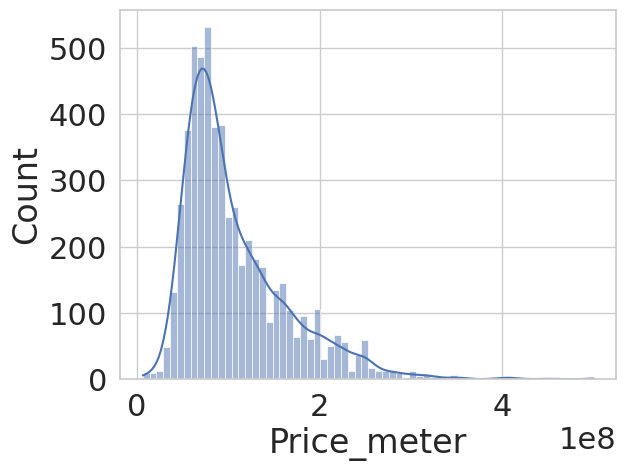

In [317]:
sns.histplot(df["Price_meter"], kde=True)
plt.show()

In [229]:
# sns.pairplot(df,hue="Price_group")
# plt.show()

In [ ]:
corr_date = df.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(corr_date,annot=True)
plt.show()

In [231]:
df=df.drop(['Parking',"Warehouse",'Elevator','longitude','latitude'],axis=1)
df.head()

,Meterage,Year_of_construction,Bedrooms,Floor,Number_of_floors,Number_of_floor_units,Price_group
0,136.0,1401.0,3.0,4.0,5.0,1.0,middle_Price
1,108.0,1383.0,2.0,2.0,4.0,1.0,Cheap
2,71.0,1397.0,2.0,1.0,5.0,3.0,Cheap
3,135.0,1401.0,3.0,2.0,5.0,2.0,middle_Price
4,117.0,1394.0,2.0,4.0,5.0,2.0,Cheap


In [232]:
import hvplot.pandas

In [233]:
# df.drop('Price_group', axis=1).corrwith(df.Mean_price).hvplot.barh(
#     width=600, height=400, 
#     title="Correlation between Price and Numeric Features", 
#     ylabel='Correlation', xlabel='Numerical Features',
# )


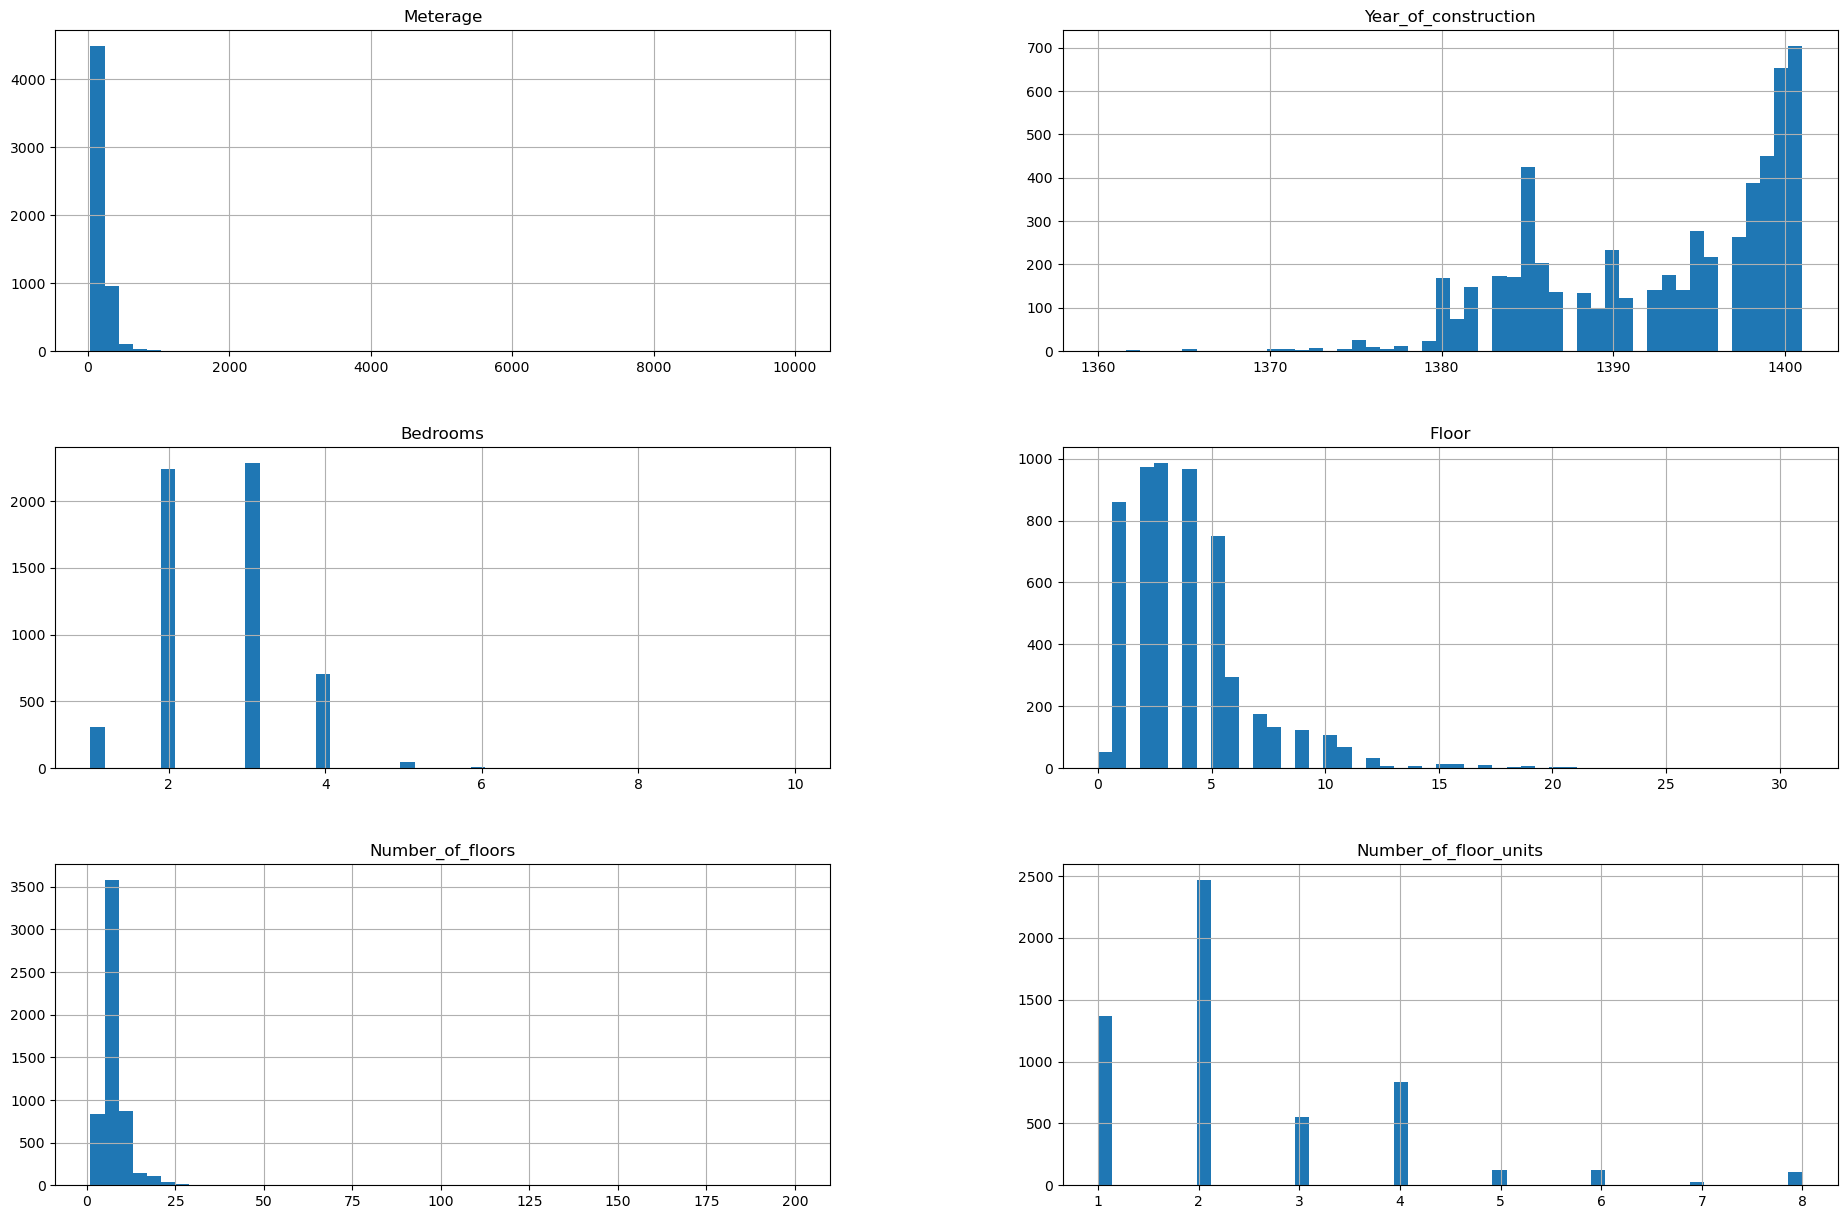

In [234]:
df.hist(bins=50, figsize=(23,15))
plt.show()

In [235]:
sns.set(font_scale=2)
sns.set_style('whitegrid')

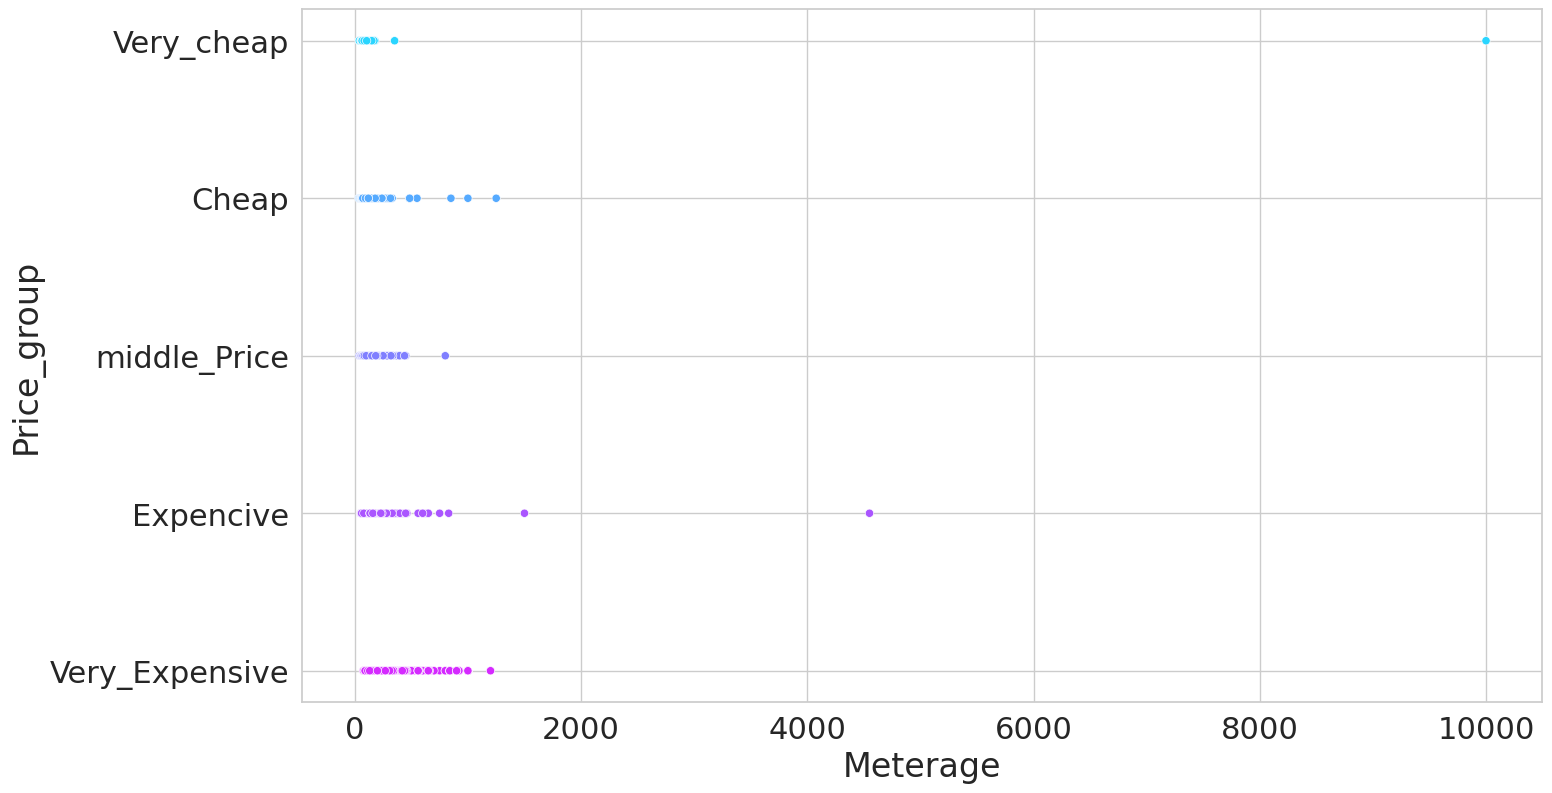

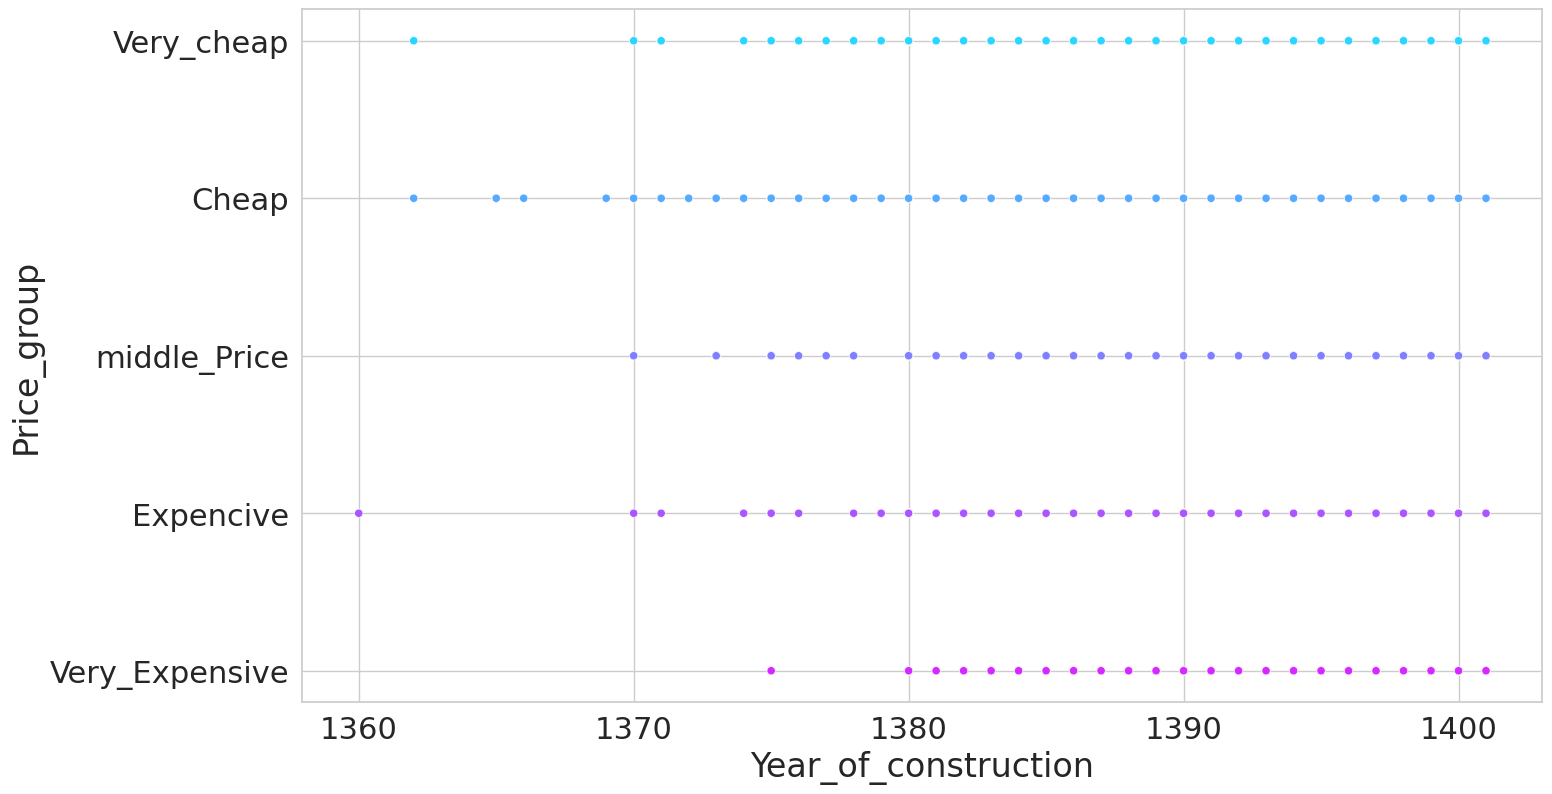

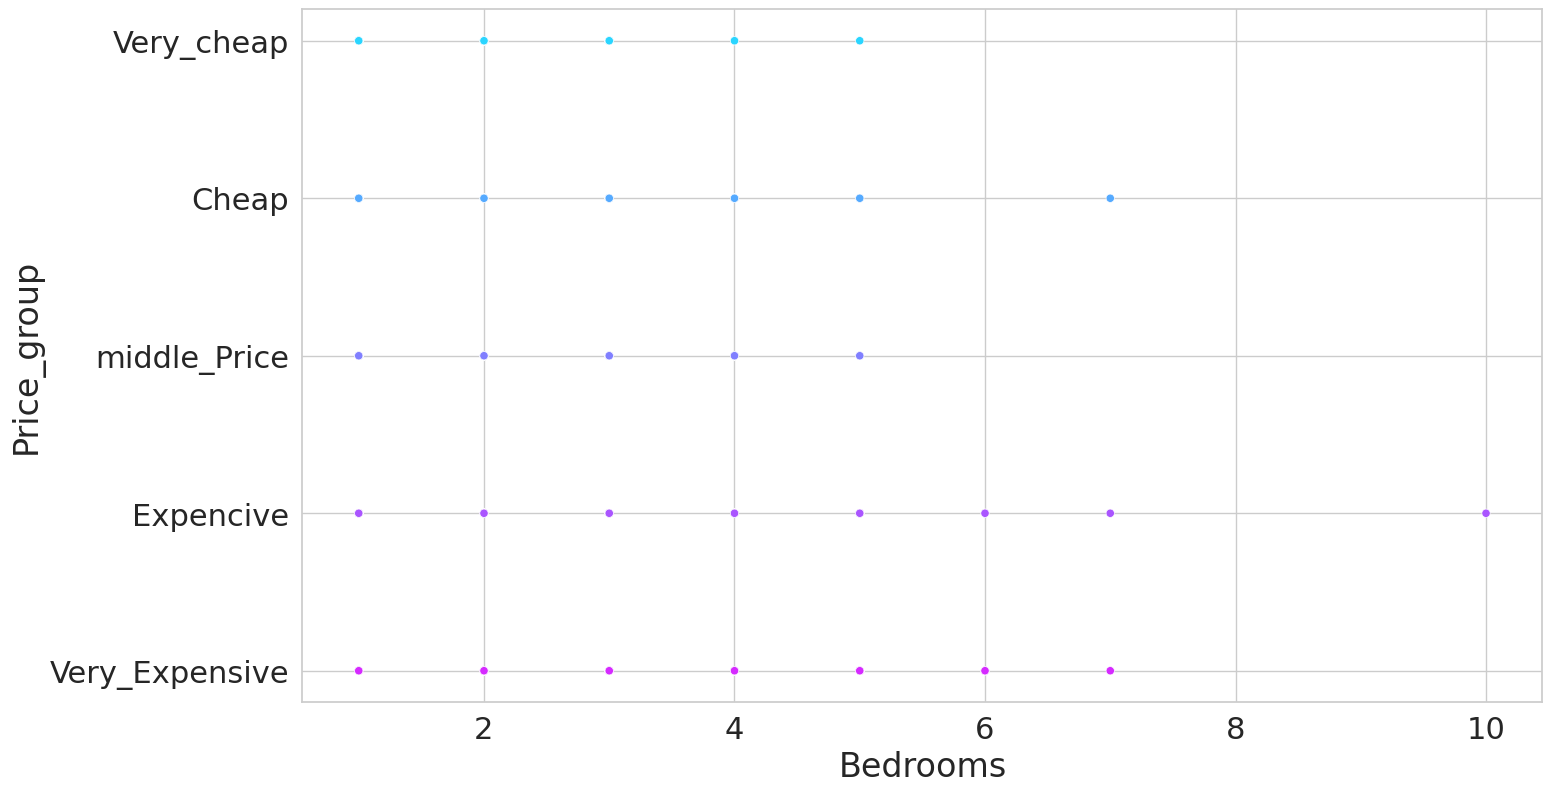

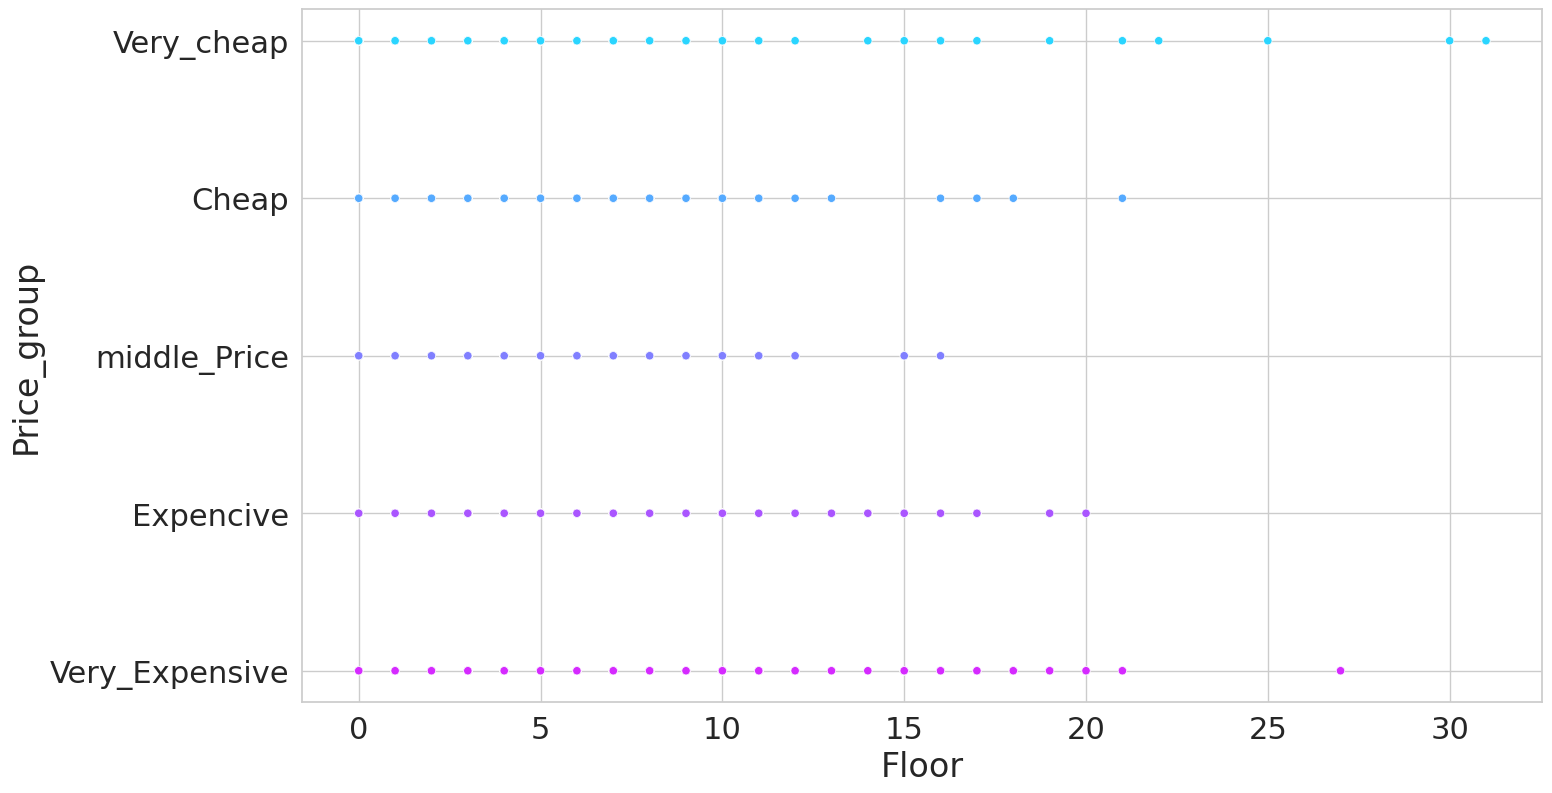

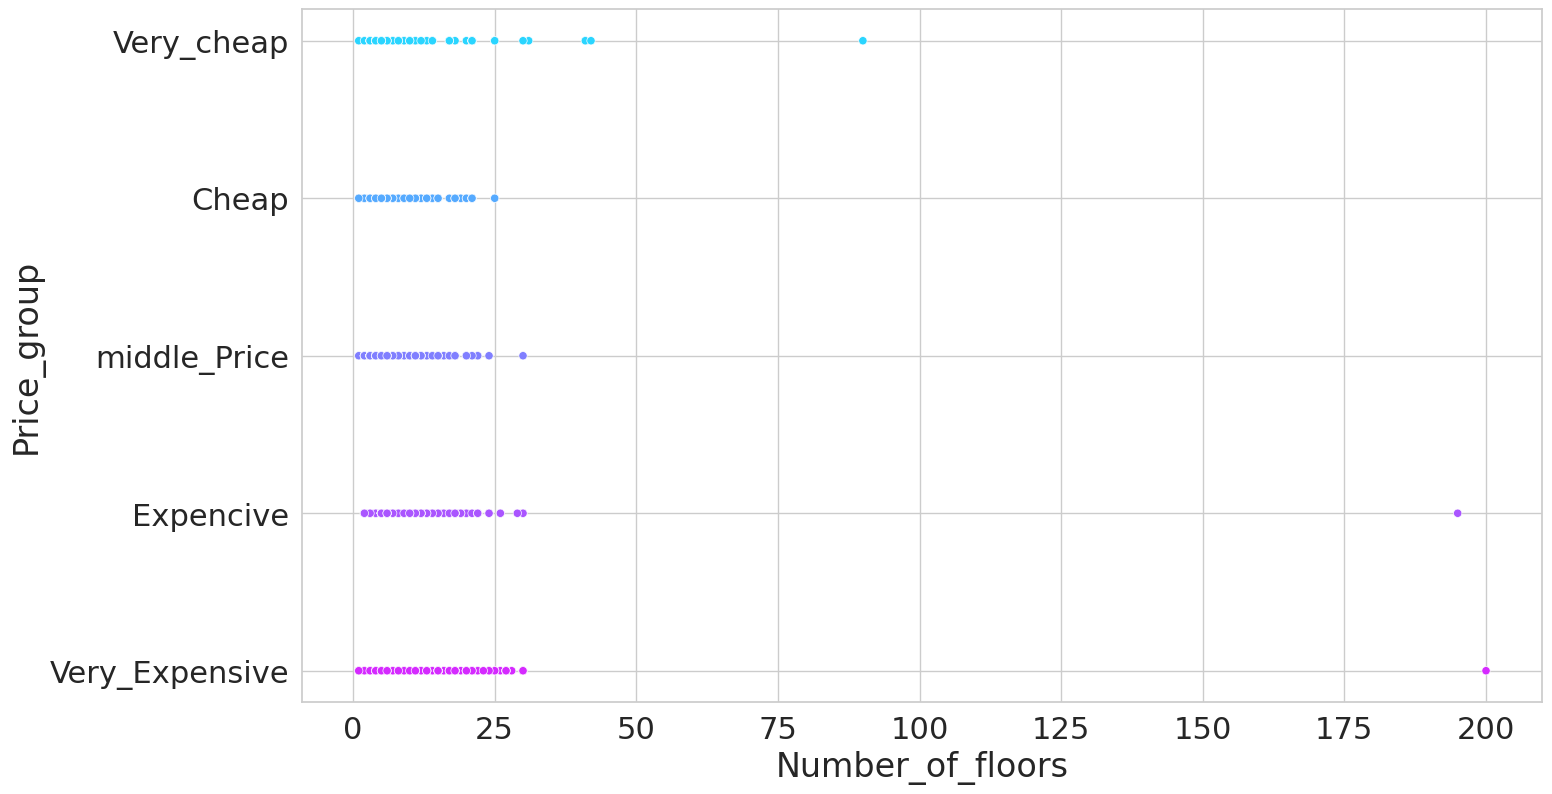

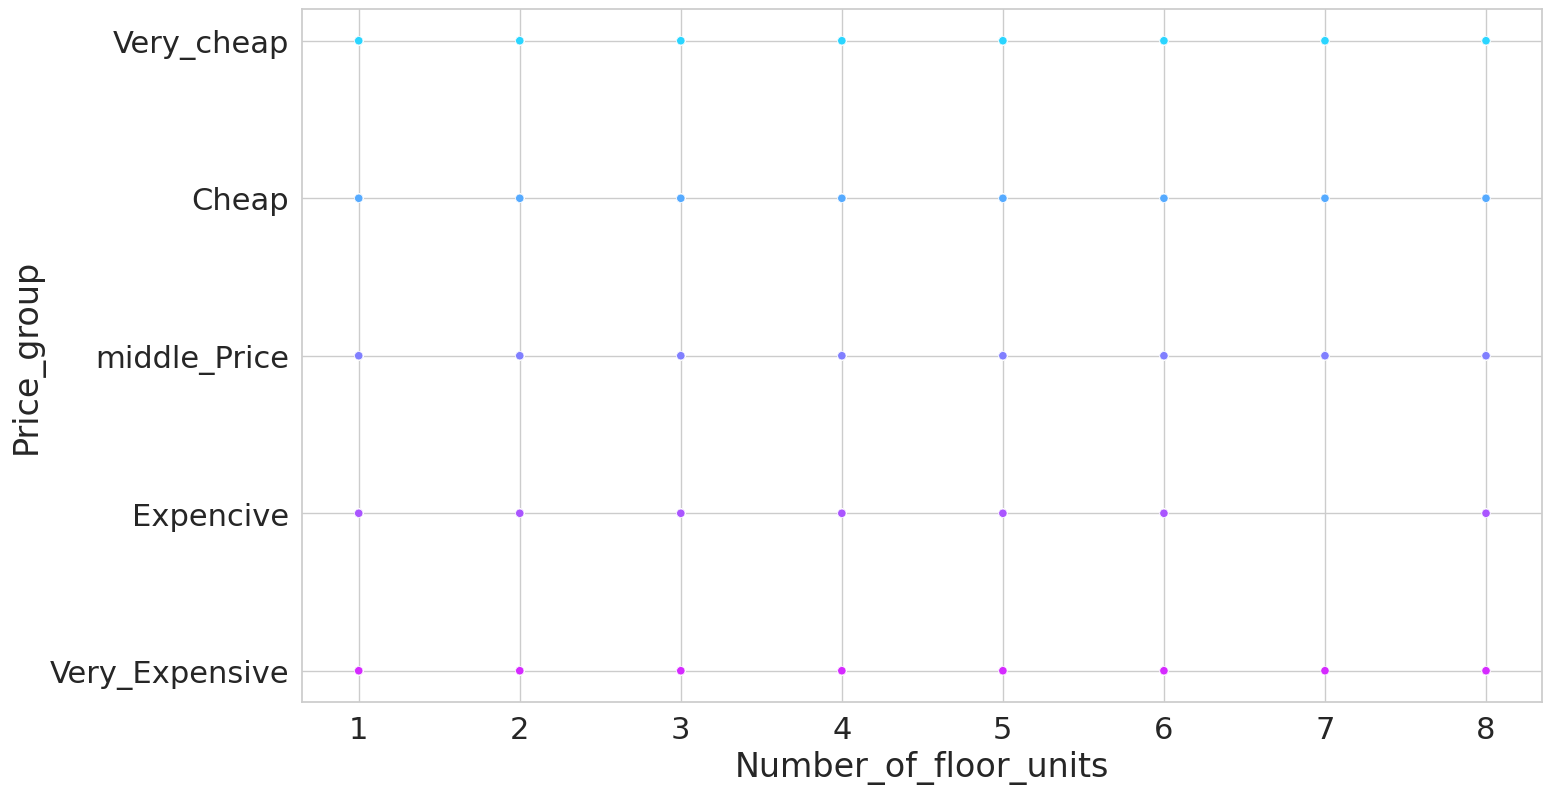

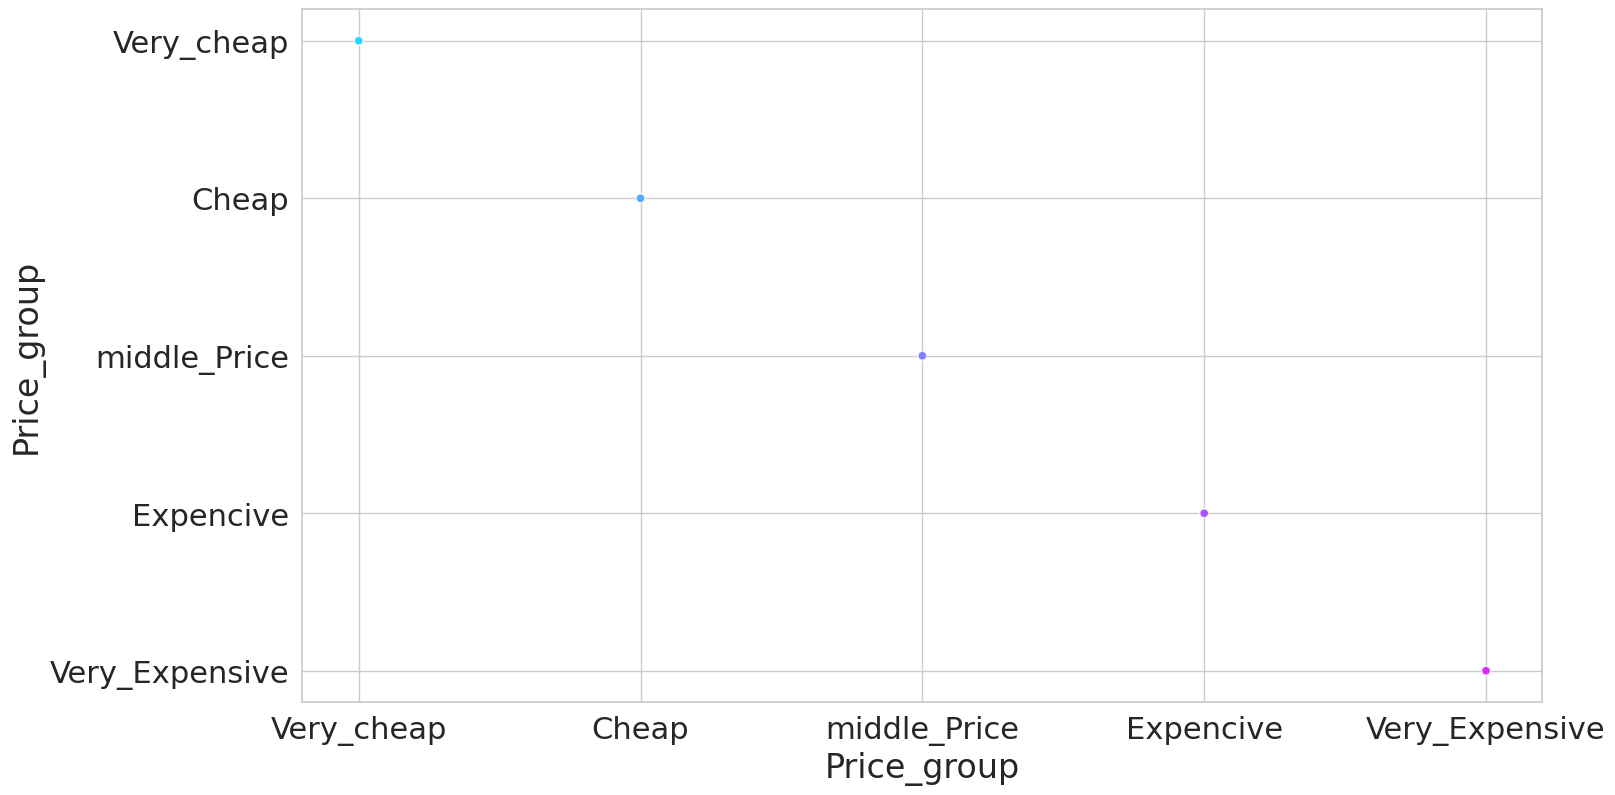

In [237]:
for feature in df.columns:
    plt.figure(figsize=(16, 9))
    sns.scatterplot(data=df, x=feature,y='Price_group',
                    hue='Price_group', palette='cool', legend=False)
    plt.show()

## Splitting the dataset into the Training set and Test set

In [238]:
X = df.drop(['Price_group'],axis=1)
y = df.filter(['Price_group'],axis=1)

In [239]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y= le.fit_transform(y)
print(y)

[4 0 0 ... 0 0 4]


/home/sara/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

# Feature Scaling

## Feature scaling with Pipeline

In [241]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from mlxtend.plotting import plot_learning_curves

In [242]:
model1= make_pipeline(preprocessing.StandardScaler(), GaussianNB())
model1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

In [243]:
Y_pred = model1.predict(X_test)

In [244]:
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(model1.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)

print('Confusion matrix \n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)

Confusion matrix 
 [[270   9   2  10  43]
 [ 72  50  39   8  81]
 [ 17  38 131   0  47]
 [ 76   2   2   2   1]
 [138  19   4   6  54]]
accuracy_Naive Bayes: 0.452


<AxesSubplot:>

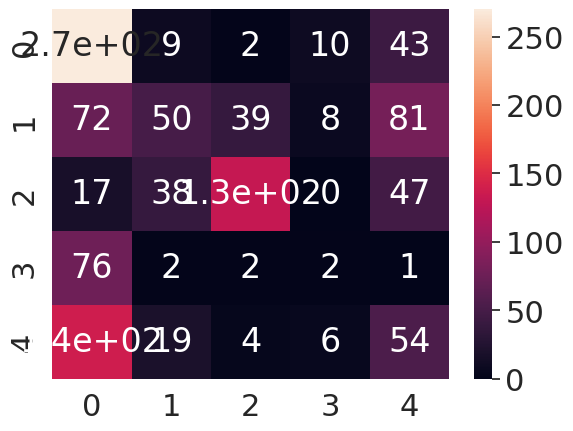

In [245]:
sns.heatmap(cm, annot=True)

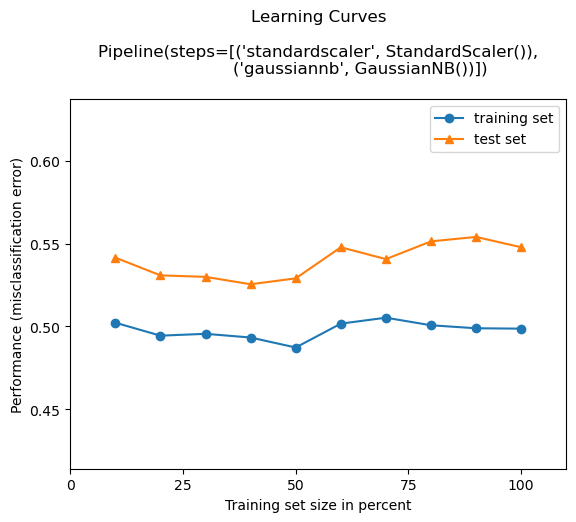

In [246]:
plot_learning_curves(X_train, y_train, X_test, y_test, model1)
plt.show()

In [ ]:
regressor.predict([[6.5]])